<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [2]:
!pip -q install xgboost

In [3]:
SEED = 42
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [4]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [5]:
# Preview train dataset
train.head()

ID  I/O Data Operations   I/O Data Bytes  \
0  ID_4W8AP96UO6           114.798900      3790.450939   
1  ID_UD3TM0ZYND            14.154240      5182.451722   
2  ID_XAG1HC0HWM             0.044444       120.821253   
3  ID_CEXD05IR09            31.369916    127228.251100   
4  ID_X6E97FT8IF             5.046181      1091.620117   

   Number of subprocesses  Time on processor  Disk Reading/sec  \
0                    28.0           0.427078          6.162365   
1                    28.0           0.138876          5.399498   
2                    28.0           0.000000          1.577765   
3                    31.0           0.523750         15.981107   
4                    25.0           0.069468          1.356022   

   Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
0         21.220403        58.492773              63.959387   
1          0.000000        22.886762              29.508369   
2          0.000000        11.733239              12.888786   
3          5.356671       602.125436            6976.986795   
4          0.000000        16.138887              13.271234   

   Network packets sent  Network packets received  Pages Read/sec  \
0              0.621206                  0.521813       24.624612   
1              0.422183                  0.444403        0.044440   
2              0.177776                  0.155554        0.044444   
3              3.311801                  5.756755        5.623394   
4              0.155609                  0.133379        0.000000   

   Pages Input/sec  Page Errors/sec  Confirmed byte radius  Label  
0              0.0      1001.533430              27.190843      1  
1              0.0      1089.121009              30.150941      0  
2              0.0       322.464081              28.163287      0  
3              0.0     12015.169690              34.204404      0  
4              0.0       550.989619              31.466889      1

In [6]:
# Preview test dataset
test.head()

ID  I/O Data Operations   I/O Data Bytes  \
0  ID_L7RNFK5JC9            32.709430    121124.141400   
1  ID_KUTY5K1G5F             2.065990      2029.713475   
2  ID_H6PJWKU831           114.524684      3888.550764   
3  ID_DNQXNVTXHE            27.036810      5581.324782   
4  ID_8CRTF1BJOD             1.177267       176.634467   

   Number of subprocesses  Time on processor  Disk Reading/sec  \
0               30.407359           0.496719          3.999064   
1               29.000000           0.000000          3.665467   
2               28.000000           0.486075          0.777719   
3               25.000000           0.314968          1.789015   
4               28.000000           0.000000          1.710369   

   Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
0          0.000000       335.565884             737.338490   
1          0.000000        63.845771              41.119875   
2          0.199985        11.354698              11.332477   
3          0.000000        44.297028              13.430214   
4          0.000000        88.161746              57.508380   

   Network packets sent  Network packets received  Pages Read/sec  \
0              1.844013                  1.910664        0.311038   
1              0.733093                  0.577589        0.044430   
2              0.177764                  0.133323        0.000000   
3              0.302369                  0.125987        0.000000   
4              0.888503                  0.777440        0.000000   

   Pages Input/sec  Page Errors/sec  Confirmed byte radius  
0              0.0       726.318848              20.008686  
1              0.0       385.473839              33.015399  
2              0.0       504.828540              30.091141  
3              0.0       465.950312              22.211252  
4              0.0       771.665166              31.032570

In [7]:
# Preview sample submission file
samplesubmission.head()

ID  Target
0  ID_L7RNFK5JC9       0
1  ID_KUTY5K1G5F       0
2  ID_H6PJWKU831       0
3  ID_DNQXNVTXHE       0
4  ID_8CRTF1BJOD       0

In [8]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

In [9]:
var_def = pd.read_csv('Variable_Definitions.csv')
var_def

Feature  \
0        I/O Data Operations   
1             I/O Data Bytes   
2     Number of subprocesses   
3          Time on processor   
4           Disk Reading/sec   
5           Disc Writing/sec   
6      Confirmed byte radius   
7             Pages Read/sec   
8            Pages Input/sec   
9            Page Errors/sec   
10                Bytes Sent   
11     Received Bytes (HTTP)   
12      Network packets sent   
13  Network packets received   

                                          Description  
0   Speed at which the process is issuing read and...  
1   Speed at which the process is reading and writ...  
2   Number of sub-processes that are currently act...  
3   The total time, in seconds, that a process has...  
4                    Speed of disk reading operations  
5                 Speed of writing operations to disk  
6   The ratio of Memory/Bytes committed and Memory...  
7   Speed rate at which the disk was read in order...  
8   Speed at which pages are written to disk to fr...  
9   This is the average number of pages with fault...  
10  The rate at which bytes leave the browser’s HT...  
11  Speed of bytes arriving to the browser’s HTTP ...  
12       Speed of sending packets in the TCP protocol  
13       Packet reception speed over the TCP protocol

<a name="Statistics"></a>
## 3. Statistical Summaries

In [10]:
# Train statistical summary
train.describe(include = 'all')

ID  I/O Data Operations   I/O Data Bytes  \
count            8908          8908.000000     8.908000e+03   
unique           8908                  NaN              NaN   
top     ID_4W8AP96UO6                  NaN              NaN   
freq                1                  NaN              NaN   
mean              NaN            36.429205     1.135564e+05   
std               NaN            75.884647     4.896846e+05   
min               NaN             0.000000     0.000000e+00   
25%               NaN             1.394404     8.136318e+02   
50%               NaN            11.613803     4.930482e+03   
75%               NaN            34.494953     3.940357e+04   
max               NaN          1795.316255     4.677280e+06   

        Number of subprocesses  Time on processor  Disk Reading/sec  \
count              8908.000000        8908.000000       8908.000000   
unique                     NaN                NaN               NaN   
top                        NaN                NaN               NaN   
freq                       NaN                NaN               NaN   
mean                 29.811900           0.496405          5.353260   
std                   5.691411           1.593626         19.286690   
min                   1.000000           0.000000          0.044459   
25%                  27.000000           0.000000          0.755629   
50%                  28.000000           0.034734          1.711077   
75%                  30.000000           0.451350          5.845619   
max                  51.000000          25.246148       1064.819285   

        Disc Writing/sec  Bytes Sent/sent  Received Bytes (HTTP)  \
count        8908.000000      8908.000000           8.908000e+03   
unique               NaN              NaN                    NaN   
top                  NaN              NaN                    NaN   
freq                 NaN              NaN                    NaN   
mean            1.046153       559.546628           1.655804e+04   
std            15.667814      1939.745234           9.042803e+04   
min             0.000000         1.197890           1.554938e+00   
25%             0.000000        33.843800           2.737770e+01   
50%             0.000000        67.366295           8.905770e+01   
75%             0.022229       221.314810           5.613814e+02   
max           831.503948     98097.784300           4.812144e+06   

        Network packets sent  Network packets received  Pages Read/sec  \
count            8908.000000               8908.000000     8908.000000   
unique                   NaN                       NaN             NaN   
top                      NaN                       NaN             NaN   
freq                     NaN                       NaN             NaN   
mean                4.795485                 12.625792        0.988036   
std                20.797585                 61.246541       12.495768   
min                 0.022183                  0.022183        0.000000   
25%                 0.399999                  0.333225        0.000000   
50%                 0.710898                  0.635705        0.022222   
75%                 1.555063                  1.711155        0.088887   
max              1118.878021               3183.701036      475.031124   

        Pages Input/sec  Page Errors/sec  Confirmed byte radius        Label  
count       8908.000000      8908.000000            8908.000000  8908.000000  
unique              NaN              NaN                    NaN          NaN  
top                 NaN              NaN                    NaN          NaN  
freq                NaN              NaN                    NaN          NaN  
mean           0.004177      2779.178084              28.436192     0.269870  
std            0.082923      4996.003166               3.970140     0.443917  
min            0.000000        16.143987              18.057942     0.000000  
25%            0.000000       351.620535              25.266134     0.0

<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [11]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [12]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

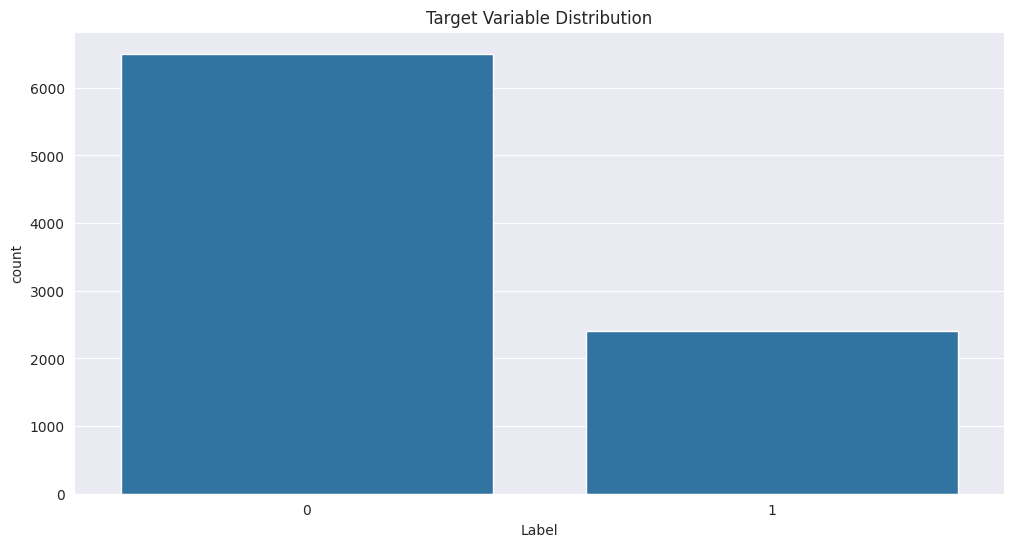

In [13]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [14]:
train['Label'].value_counts()

Label
0    6504
1    2404
Name: count, dtype: int64

There is a class imbalance in our dataset

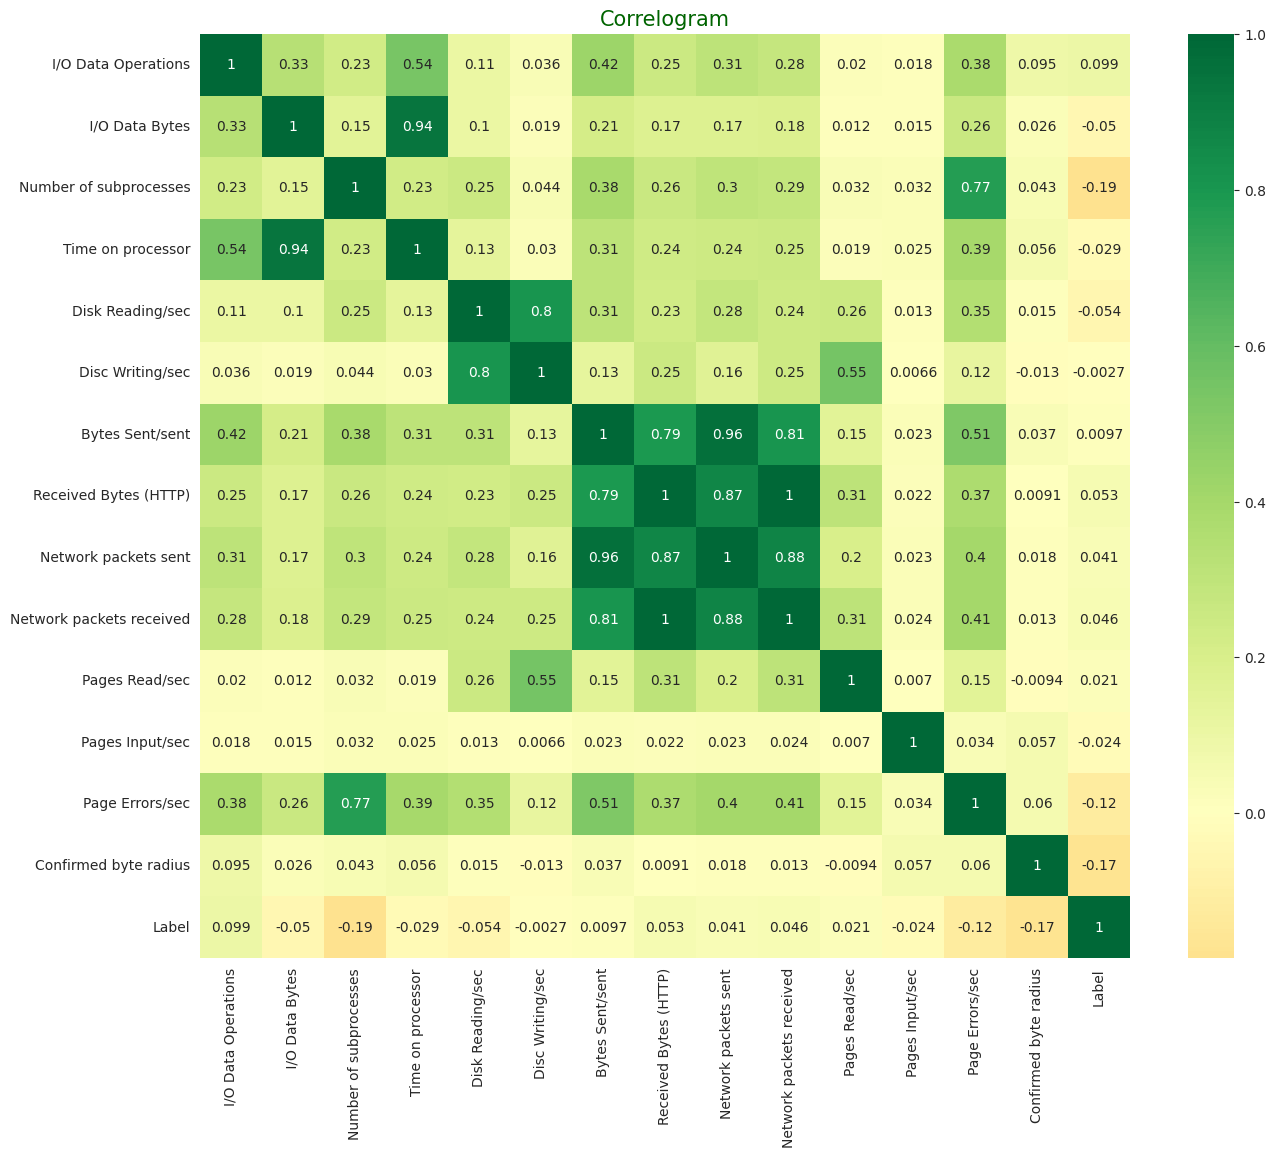

In [15]:
# Plotting a heatmap to show correlations between variables
corr = train.drop("ID",axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target


# 6. Features Engineering

In [16]:
var_def

Feature  \
0        I/O Data Operations   
1             I/O Data Bytes   
2     Number of subprocesses   
3          Time on processor   
4           Disk Reading/sec   
5           Disc Writing/sec   
6      Confirmed byte radius   
7             Pages Read/sec   
8            Pages Input/sec   
9            Page Errors/sec   
10                Bytes Sent   
11     Received Bytes (HTTP)   
12      Network packets sent   
13  Network packets received   

                                          Description  
0   Speed at which the process is issuing read and...  
1   Speed at which the process is reading and writ...  
2   Number of sub-processes that are currently act...  
3   The total time, in seconds, that a process has...  
4                    Speed of disk reading operations  
5                 Speed of writing operations to disk  
6   The ratio of Memory/Bytes committed and Memory...  
7   Speed rate at which the disk was read in order...  
8   Speed at which pages are written to disk to fr...  
9   This is the average number of pages with fault...  
10  The rate at which bytes leave the browser’s HT...  
11  Speed of bytes arriving to the browser’s HTTP ...  
12       Speed of sending packets in the TCP protocol  
13       Packet reception speed over the TCP protocol

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [18]:
X = train.drop(columns=['ID','Label'])
y = train['Label']

In [19]:
list(X.columns)

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

In [23]:
# Supposons que votre DataFrame d'origine s'appelle df
# Voici les colonnes présentes dans df pour rappel :
# ['I/O Data Operations', 'I/O Data Bytes', 'Number of subprocesses',
#  'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
#  'Confirmed byte radius', 'Pages Read/sec', 'Pages Input/sec',
#  'Page Errors/sec', 'Bytes Sent', 'Received Bytes (HTTP)',
#  'Network packets sent', 'Network packets received']



['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

# Création de nouvelles features basées sur les suggestions

for df in [X, test]:
    # 1. Relations entre caractéristiques liées au réseau
    df['Compression Rate'] = df['Bytes Sent/sent'] / (df['Network packets sent'] + 1e-9)
    df['Decompression Rate'] = df['Received Bytes (HTTP)'] / (df['Network packets received'] + 1e-9)
    df['Send/Receive Ratio'] = df['Bytes Sent/sent'] / (df['Received Bytes (HTTP)'] + 1e-9)

    # 2. Relations entre la mémoire et les erreurs de pages
    df['Error/Page Read Ratio'] = df['Page Errors/sec'] / (df['Pages Read/sec'] + 1e-9)
    df['Memory IO Efficiency'] = df['Pages Input/sec'] / (df['Pages Read/sec'] + 1e-9)

    # 3. Combinaisons liées au stockage
    df['Disk Read/Write Ratio'] = df['Disk Reading/sec'] / (df['Disc Writing/sec'] + 1e-9)
    df['Operations per Byte'] = df['I/O Data Operations'] / (df[' I/O Data Bytes'] + 1e-9)

    # 4. Aspects temporels
    df['Processor Utilization Rate'] = df['Time on processor'] / (df['I/O Data Operations'] + 1e-9)

    # 5. Création de statistiques globales
    # Réseau : Moyenne et écart-type des caractéristiques réseau
    network_features = ['Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent', 'Network packets received']
    df['Network Mean'] = df[network_features].mean(axis=1)
    df['Network Std'] = df[network_features].std(axis=1)

    # Mémoire : Moyenne et écart-type des caractéristiques mémoire
    memory_features = ['Pages Read/sec', 'Pages Input/sec', 'Page Errors/sec']
    df['Memory Mean'] = df[memory_features].mean(axis=1)
    df['Memory Std'] = df[memory_features].std(axis=1)

    # 6. Indicateurs de surcharge suspecte
    df['Resource/Subprocess Ratio'] = df[' I/O Data Bytes'] / (df['Number of subprocesses'] + 1e-9)

    mean_radius = df['Confirmed byte radius'].mean()
    std_radius = df['Confirmed byte radius'].std()
    df['High Memory Pressure'] = (df['Confirmed byte radius'] > mean_radius + std_radius).astype(int)

    # 7. Transformations non linéaires
    df['Log Disk Reading'] = np.log(df['Disk Reading/sec'] + 1e-9)
    df['Log Bytes Sent'] = np.log(df['Bytes Sent/sent'] + 1e-9)
    df['Quadratic IO Operations'] = (df['I/O Data Operations'] ** 2) / (df[' I/O Data Bytes'] + 1e-9)

    # 8. Interactions entre caractéristiques
    df['Network Data Interaction'] = df['Bytes Sent/sent'] * df['Received Bytes (HTTP)']
    df['Memory Processor Interaction'] = df['Time on processor'] * df['Confirmed byte radius']

    # 9. Ajout de seuils spécifiques pour le cryptojacking
    mean_time = df['Time on processor'].mean()
    std_time = df['Time on processor'].std()
    df['High CPU Usage'] = (df['Time on processor'] > mean_time + std_time).astype(int)

# Affichage des nouvelles features
print("Nouvelles features ajoutées :")
print(df.columns)

Nouvelles features ajoutées :
Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius',
       'Compression Rate', 'Decompression Rate', 'Send/Receive Ratio',
       'Error/Page Read Ratio', 'Memory IO Efficiency',
       'Disk Read/Write Ratio', 'Operations per Byte',
       'Processor Utilization Rate', 'Network Mean', 'Network Std',
       'Memory Mean', 'Memory Std', 'Resource/Subprocess Ratio',
       'High Memory Pressure', 'Log Disk Reading', 'Log Bytes Sent',
       'Quadratic IO Operations', 'Network Data Interaction',
       'Memory Processor Interaction', 'High CPU Usage'],
      dtype='object')


In [24]:
len(X.columns)

34

<a name="Preprocess"></a>
## 7. Modeling

In [25]:
# split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [26]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6681, 34), (2227, 34), (6681,), (2227,))

In [27]:
X_train.head(3)

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
3296             1.066897       162.879576                    28.0   
1760            47.827710     73713.107310                    41.0   
8794            68.077415     14707.032390                    27.0   

      Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
3296           0.034730          0.911308          0.000000        25.094302   
1760           0.417567         33.686699          2.868372      6829.350076   
8794           0.729044          0.755428          0.000000        74.276370   

      Received Bytes (HTTP)  Network packets sent  Network packets received  \
3296              24.182994              0.355632                  0.311178   
1760          347696.363400             78.780181                240.898810   
8794              73.343194              0.533243                  0.488807   

      ...  Memory Mean   Memory Std  Resource/Subprocess Ratio  \
3296  ...   115.773119   200.505676                   5.817128   
1760  ...  4854.123624  8405.355002                1797.880666   
8794  ...   452.331172   783.460571                 544.704903   

      High Memory Pressure  Log Disk Reading  Log Bytes Sent  \
3296                     1         -0.092875        3.222641   
1760                     0          3.517103        8.828985   
8794                     1         -0.280470        4.307793   

      Quadratic IO Operations  Network Data Interaction  \
3296                 0.006988              6.068553e+02   
1760                 0.031032              2.374540e+09   
8794                 0.315124              5.447666e+03   

      Memory Processor Interaction  High CPU Usage  
3296                      1.245479               0  
1760                     13.237961               0  
8794                     24.780323               0  

[3 rows x 34 columns]

In [28]:
X_train.describe()

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
count          6681.000000     6.681000e+03             6681.000000   
mean             36.851188     1.141335e+05               29.833217   
std              77.618945     4.931241e+05                5.724027   
min               0.000000     0.000000e+00                1.000000   
25%               1.422503     8.272468e+02               27.000000   
50%              11.912893     5.036514e+03               28.000000   
75%              34.866070     3.964202e+04               30.000000   
max            1795.316255     4.677280e+06               51.000000   

       Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
count        6681.000000       6681.000000       6681.000000      6681.000000   
mean            0.502617          5.495917          1.211844       560.264540   
std             1.632962         21.830528         17.892140      2035.140606   
min             0.000000          0.044459          0.000000         1.197890   
25%             0.000000          0.755811          0.000000        33.688638   
50%             0.034734          1.711526          0.000000        66.993251   
75%             0.451355          5.843947          0.022229       221.801365   
max            25.246148       1064.819285        831.503948     98097.784300   

       Received Bytes (HTTP)  Network packets sent  Network packets received  \
count           6.681000e+03           6681.000000               6681.000000   
mean            1.660275e+04              4.790166                 12.663932   
std             9.189995e+04             21.882436                 62.252208   
min             1.554938e+00              0.022183                  0.022183   
25%             2.793116e+01              0.400005                  0.333313   
50%             8.795315e+01              0.710886                  0.644222   
75%             5.585084e+02              1.555397                  1.711088   
max             4.812144e+06           1118.878021               3183.701036   

       ...   Memory Mean    Memory Std  Resource/Subprocess Ratio  \
count  ...   6681.000000   6681.000000                6681.000000   
mean   ...    933.456989   1615.801346                3580.484237   
std    ...   1699.808874   2942.272983               15534.841818   
min    ...      5.389659      9.313530                   0.000000   
25%    ...    117.439751    203.373127                  28.569617   
50%    ...    228.206433    395.265137                 172.344366   
75%    ...    457.281782    791.063445                1369.634310   
max    ...  32677.173744  56598.427656              144657.020745   

       High Memory Pressure  Log Disk Reading  Log Bytes Sent  \
count           6681.000000       6681.000000     6681.000000   
mean               0.158659          0.796812        4.617751   
std                0.365385          1.261032        1.642376   
min                0.000000         -3.113192        0.180562   
25%                0.000000         -0.279964        3.517161   
50%                0.000000          0.537385        4.204592   
75%                0.000000          1.765406        5.401782   
max                1.000000          6.970560       11.493720   

       Quadratic IO Operations  Network Data Interaction  \
count              6681.000000              6.681000e+03   
mean                  0.115066              1.583114e+08   
std                   0.412831              4.089974e+09   
min                   0.000000              1.899726e+00   
25%                   0.003655              9.236719e+02   
50%                   0.018142              5.919041e+03   
75%                   0.075727              1.560887e+05   
max                   5.202551              2.704398e+11   

       Memory Processor Interaction  High CPU Usage  
count                   6681.000000     6681.000000  
mean                      14.711087        0.042958  
std  

In [ ]:
# # Calcul des poids des classes
# class_counts = np.bincount(y_train)  # Compte les occurrences de chaque classe
# total_samples = len(y_train)

# # Calcul des poids : inverse de la fréquence
# class_weights = total_samples / class_counts
# class_weights

In [34]:
X_train

I/O Data Operations   I/O Data Bytes  Number of subprocesses  \
3296             1.066897       162.879576                    28.0   
1760            47.827710     73713.107310                    41.0   
8794            68.077415     14707.032390                    27.0   
2139           589.079203    217518.156900                    48.0   
4509           137.786807     45116.546710                    29.0   
...                   ...              ...                     ...   
2065             5.022050      1107.339830                    27.0   
664              4.866693      5164.072457                    29.0   
2272             0.044444        16.533300                    27.0   
729             13.203689      3350.135976                    29.0   
5233          1024.316376    316393.974100                    48.0   

      Time on processor  Disk Reading/sec  Disc Writing/sec  Bytes Sent/sent  \
3296           0.034730          0.911308          0.000000        25.094302   
1760           0.417567         33.686699          2.868372      6829.350076   
8794           0.729044          0.755428          0.000000        74.276370   
2139           3.645771         23.444059          7.844315      6133.232489   
4509           0.243034          1.777608          0.000000       159.318079   
...                 ...               ...               ...              ...   
2065           0.000000          5.244265         66.019960        15.510580   
664            0.000000          8.044488          0.000000        27.000146   
2272           0.000000          2.333329          0.000000        56.377666   
729            0.069464          4.423458          0.000000        50.703055   
5233           5.521219         27.779729          6.956044     11251.390120   

      Received Bytes (HTTP)  Network packets sent  Network packets received  \
3296              24.182994              0.355632                  0.311178   
1760          347696.363400             78.780181                240.898810   
8794              73.343194              0.533243                  0.488807   
2139          112585.371100             30.710606                 92.798474   
4509             311.747928              1.888708                  1.910928   
...                     ...                   ...                       ...   
2065              33.821063              0.288879                  0.355543   
664               32.489065              0.488892                  0.488892   
2272             136.244174              0.533332                  0.466666   
729               64.284627              0.889137                  0.889137   
5233           59354.968170             51.670295                 74.894148   

      ...   Memory Mean    Memory Std  Resource/Subprocess Ratio  \
3296  ...    115.773119    200.505676                   5.817128   
1760  ...   4854.123624   8405.355002                1797.880666   
8794  ...    452.331172    783.460571                 544.704903   
2139  ...   6377.354402  11037.858538                4531.628269   
4509  ...    241.302821    417.929503                1555.742990   
...   ...           ...           ...                        ...   
2065  ...    184.764039    265.850016                  41.012586   
664   ...    461.372873    799.063523                 178.071464   
2272  ...    126.925674    219.841716                   0.612344   
729   ...    388.990159    673.712219                 115.521930   
5233  ...  12194.019281  21119.525418                6591.541127   

      High Memory Pressure  Log Disk Reading  Log Bytes Sent  \
3296                     1         -0.092875        3.222641   
1760                     0          3.517103        8.828985   
8794                     1         -0.280470        4.307793   
2139                     0          3.154617        8.721477   
4509                     0          0.575268        5.070903   
...                    ...               ...          

**START**

In [31]:
from sklearn.metrics import f1_score
import numpy as np

# Fonction pour calculer le F1-score pendant l'entraînement
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Seuil à 0.5
    f1 = f1_score(y_true, y_pred_binary)
    return "f1", f1

In [ ]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_val, label=y_val)

# # Here we set eval_metric to be 'auc' as well as other hypter parameters of xgboost
# param0 = [
#     ('max_depth', 5),
#     ('learning_rate', 0.05),
#     ('objective', 'binary:logistic'),
#     ('booster', 'gbtree'),
#     ('n_jobs', -1),
#     ('min_child_weight', 0.7),
#     ('disable_default_eval_metric', 1),
#     ('scale_pos_weight', (sum(y_train==0)/sum(y_train==1))),
#     ('random_state', SEED),
#     ('reg_lambda', 0.5)
# ]

# watchlist = [(dtrain, "trn"), (dtest, "tst")]
# n_estimators = 1500

# # This is the same as fitting
# model = xgb.train(param0, dtrain, n_estimators , evals=watchlist, feval=f1_eval,)

In [46]:
# Calcul des poids des classes
class_counts = np.bincount(y_train)  # Compte les occurrences de chaque classe
total_samples = len(y_train)

# Calcul des poids : inverse de la fréquence
class_weights = total_samples / class_counts
class_weights

array([1.3696187 , 3.70549085])

In [50]:
# bestTest = 0.9686486891
# bestTest = 0.971740873

# modèle CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=7000,
    learning_rate=0.01,
    depth=8,
    loss_function='Logloss',  # Fonction de perte pour la classification binaire
    verbose=200,
    eval_metric='F1',  # Optimiser pour le F1-score
    class_weights=1.5*class_weights,  # Utiliser les poids de classe
    early_stopping_rounds=1000,
    random_state=SEED
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8536086	test: 0.8639202	best: 0.8639202 (0)	total: 76.3ms	remaining: 8m 54s
200:	learn: 0.9417788	test: 0.9350851	best: 0.9362687 (196)	total: 7.18s	remaining: 4m 2s
400:	learn: 0.9643172	test: 0.9501344	best: 0.9504272 (389)	total: 14.2s	remaining: 3m 53s
600:	learn: 0.9783634	test: 0.9586265	best: 0.9594953 (588)	total: 19.9s	remaining: 3m 31s
800:	learn: 0.9853043	test: 0.9610440	best: 0.9636559 (766)	total: 27.5s	remaining: 3m 32s
1000:	learn: 0.9931070	test: 0.9634106	best: 0.9636559 (766)	total: 33.3s	remaining: 3m 19s
1200:	learn: 0.9957686	test: 0.9654803	best: 0.9654803 (1164)	total: 41.1s	remaining: 3m 18s
1400:	learn: 0.9982605	test: 0.9666823	best: 0.9672844 (1367)	total: 47.3s	remaining: 3m 8s
1600:	learn: 0.9991807	test: 0.9669832	best: 0.9673180 (1514)	total: 55.1s	remaining: 3m 5s
1800:	learn: 0.9994878	test: 0.9681890	best: 0.9681890 (1790)	total: 1m 1s	remaining: 2m 58s
2000:	learn: 0.9996926	test: 0.9688294	best: 0.9690952 (1940)	total: 1m 9s	remaining: 2

In [ ]:
# bestTest = 0.9687929638
# bestIteration = 4651

# Shrink model to first 4652 iterations.
#               precision    recall  f1-score   support

#            0       0.98      0.98      0.98      1626
#            1       0.96      0.96      0.96       601

#     accuracy                           0.98      2227
#    macro avg       0.97      0.97      0.97      2227
# weighted avg       0.98      0.98      0.98      2227

# Accuracy:  0.9757521329142343
# Confusion Matrix:
#  [[1599   27]
#  [  27  574]]

**END**

In [70]:
# bestTest = 0.9686486891
# bestTest = 0.971740873

# modèle CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=7000,
    learning_rate=0.012,
    depth=4,
    loss_function='Logloss',  # Fonction de perte pour la classification binaire
    verbose=200,
    eval_metric='F1',  # Optimiser pour le F1-score
    class_weights=class_weights  # Utiliser les poids de classe
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8178134	test: 0.8308387	best: 0.8308387 (0)	total: 4.11ms	remaining: 28.8s
200:	learn: 0.9047744	test: 0.9000990	best: 0.9007127 (199)	total: 804ms	remaining: 27.2s
400:	learn: 0.9270838	test: 0.9265211	best: 0.9267985 (398)	total: 2.59s	remaining: 42.6s
600:	learn: 0.9413868	test: 0.9391566	best: 0.9400283 (593)	total: 4.35s	remaining: 46.3s
800:	learn: 0.9535863	test: 0.9454793	best: 0.9463516 (758)	total: 5.22s	remaining: 40.4s
1000:	learn: 0.9637641	test: 0.9509995	best: 0.9527376 (993)	total: 6.04s	remaining: 36.2s
1200:	learn: 0.9709360	test: 0.9579844	best: 0.9585726 (1185)	total: 6.97s	remaining: 33.7s
1400:	learn: 0.9777338	test: 0.9588854	best: 0.9594564 (1292)	total: 7.86s	remaining: 31.4s
1600:	learn: 0.9831346	test: 0.9650620	best: 0.9653598 (1585)	total: 8.79s	remaining: 29.6s
1800:	learn: 0.9854408	test: 0.9665532	best: 0.9677154 (1746)	total: 9.71s	remaining: 28s
2000:	learn: 0.9879464	test: 0.9671842	best: 0.9677154 (1746)	total: 10.7s	remaining: 26.7s
2200

In [44]:
# modèle CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.005,
    depth=5,
    loss_function='Logloss',  # Fonction de perte pour la classification binaire
    verbose=50,
    eval_metric='F1'  # Optimiser pour le F1-score
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6767956	test: 0.6997972	best: 0.6997972 (0)	total: 5.12ms	remaining: 25.6s
50:	learn: 0.7283951	test: 0.7344863	best: 0.7383367 (49)	total: 235ms	remaining: 22.8s
100:	learn: 0.7665552	test: 0.7582748	best: 0.7600000 (97)	total: 486ms	remaining: 23.6s
150:	learn: 0.7816623	test: 0.7772326	best: 0.7784314 (148)	total: 921ms	remaining: 29.6s
200:	learn: 0.8083467	test: 0.8011583	best: 0.8011583 (197)	total: 1.49s	remaining: 35.6s
250:	learn: 0.8268439	test: 0.8087954	best: 0.8099331 (248)	total: 1.97s	remaining: 37.3s
300:	learn: 0.8361582	test: 0.8292683	best: 0.8295880 (294)	total: 2.54s	remaining: 39.7s
350:	learn: 0.8465839	test: 0.8350419	best: 0.8361266 (349)	total: 3.1s	remaining: 41.1s
400:	learn: 0.8558226	test: 0.8439520	best: 0.8439520 (393)	total: 3.62s	remaining: 41.5s
450:	learn: 0.8631772	test: 0.8516484	best: 0.8516484 (445)	total: 4.22s	remaining: 42.6s
500:	learn: 0.8702522	test: 0.8579235	best: 0.8579235 (500)	total: 4.65s	remaining: 41.8s
550:	learn: 0.875

In [45]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1626
           1       0.98      0.93      0.96       601

    accuracy                           0.98      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.98      0.98      0.98      2227



In [39]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1626
           1       0.89      0.97      0.93       601

    accuracy                           0.96      2227
   macro avg       0.94      0.96      0.95      2227
weighted avg       0.96      0.96      0.96      2227



In [26]:
# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1626
           1       0.98      0.93      0.95       601

    accuracy                           0.97      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.97      0.97      0.97      2227



In [46]:
#make predictions on test set
test['Target'] = model.predict(test.drop("ID", axis=1))

In [47]:
sub = test[['ID', 'Target']]

In [48]:
sub.head()

ID  Target
0  ID_L7RNFK5JC9       0
1  ID_KUTY5K1G5F       0
2  ID_H6PJWKU831       1
3  ID_DNQXNVTXHE       1
4  ID_8CRTF1BJOD       0

In [49]:
sub.to_csv('sub_3.csv', index=False)

In [51]:
importance = model.get_feature_importance(prettified=True)
importance

Feature Id  Importances
0        I/O Data Operations    32.902247
1             I/O Data Bytes    13.752477
2                   IO_Ratio    10.325189
3           Disk Reading/sec     6.033181
4          Time on processor     5.499493
5     Number of subprocesses     5.461846
6      Confirmed byte radius     5.420621
7            Page Errors/sec     4.588565
8      Received Bytes (HTTP)     2.841847
9            Bytes Sent/sent     2.604969
10  Network packets received     2.540999
11           HTTP_Byte_Ratio     2.488875
12      Network packets sent     1.975984
13      Network_Packet_Ratio     1.415947
14            Pages Read/sec     0.763801
15             Disk_IO_Ratio     0.755444
16          Disc Writing/sec     0.627303
17           Pages Input/sec     0.001212

In [63]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1626
           1       0.96      0.96      0.96       601

    accuracy                           0.98      2227
   macro avg       0.97      0.97      0.97      2227
weighted avg       0.98      0.98      0.98      2227

Accuracy:  0.9784463403682083
Confusion Matrix: 
 [[1603   23]
 [  25  576]]


In [52]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on validation set
preds = model.predict(X_val)

#check performance of the model
print(classification_report(y_val, preds))

print("Accuracy: ", accuracy_score(y_val, preds))

print("Confusion Matrix: \n", confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1626
           1       0.98      0.93      0.96       601

    accuracy                           0.98      2227
   macro avg       0.98      0.96      0.97      2227
weighted avg       0.98      0.98      0.98      2227

Accuracy:  0.9770992366412213
Confusion Matrix: 
 [[1616   10]
 [  41  560]]


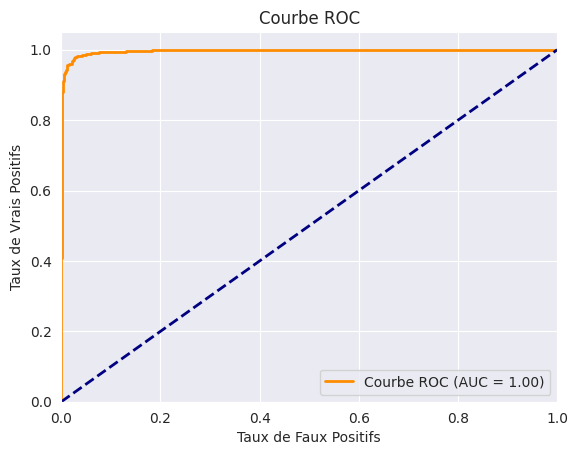

In [55]:
# Tentation de résolution des faux négatifs

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
import numpy as np

# Prédire les probabilités
y_probs = model.predict_proba(X_val)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

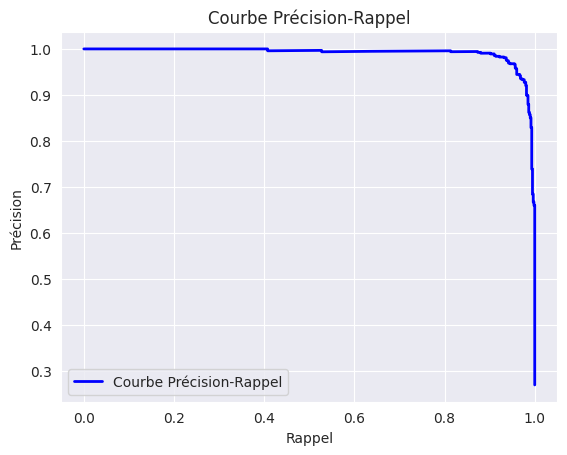

In [56]:
# Courbe Précision-Rappel
precision, recall, pr_thresholds = precision_recall_curve(y_val, y_probs)
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Courbe Précision-Rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc="lower left")
plt.show()

In [57]:
# Calcul des F1-Score pour chaque seuil
f1_scores = [f1_score(y_val, (y_probs > threshold)) for threshold in pr_thresholds]
best_threshold = pr_thresholds[np.argmax(f1_scores)]
print("Seuil optimal pour maximiser le F1-Score : ", best_threshold)

Seuil optimal pour maximiser le F1-Score :  0.36233079306719274


# Modifions le threshold à 0.36

In [58]:
# Prédire les probabilités
y_probs = model.predict_proba(X_val)[:, 1]

# Seuil optimal
y_pred_optimal = (y_probs > best_threshold).astype(int)

# check performance of the model
print(classification_report(y_val, y_pred_optimal))

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred_optimal)
print("Matrice de confusion :\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1626
           1       0.97      0.96      0.96       601

    accuracy                           0.98      2227
   macro avg       0.98      0.97      0.97      2227
weighted avg       0.98      0.98      0.98      2227

Matrice de confusion :
 [[1606   20]
 [  26  575]]


# Test de l'usage de plusieurs modèles à la fois

In [53]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


# Définition des modèles de base
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=300,  # Nombre d'arbres
        max_depth=7,       # Profondeur maximale
        n_jobs=-1,         # Utilisation de tous les cœurs disponibles
        random_state=0
    )),
    ('cat', CatBoostClassifier(
        iterations=1500,       # Nombre d'itérations
        learning_rate=0.03,    # Taux d'apprentissage
        depth=6,               # Profondeur des arbres
        random_seed=0,
        verbose=0              # Désactiver les logs
    )),
]

# StackingClassifier
model_2 = StackingClassifier(
    estimators=estimators,      # Modèles de base
    final_estimator=None,       # Par défaut : régression logistique pour le méta-modèle
    cv=5,                       # Validation croisée à 5 plis
    n_jobs=-1,                  # Utilisation de tous les cœurs
    verbose=1                   # Affichage des logs
)

# Entraîner le modèle
model_2.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=0)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7de51df1a0e0>)],
                   n_jobs=-1, verbose=1)

In [54]:
# Prédictions et évaluation
y_pred = model_2.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.4f}")

print("Accuracy: ", accuracy_score(y_val, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_val, y_pred))

F1 Score: 0.9646
Accuracy:  0.9811405478221823
Confusion Matrix: 
 [[1612   14]
 [  28  573]]
